# Importing libraries, data & mounting drive

In [ ]:
# Performing linear regression on a dataset with transformed features
# Created by Sebastian Bommer 2020-05-17
# Modified by ___

Ridge regression:
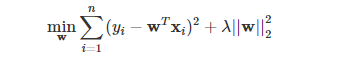



In [ ]:
# importing libraries
import pandas as pd
import sklearn
import numpy as np

In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data
baseDir = '/content/drive/My Drive/ETHZ/IML/Project_1b/'
dir = '/content/drive/My Drive/ETHZ/IML/Project_1b/train.csv'

D = pd.read_csv(dir, index_col='Id')
print(f'\n Data: \n {D}')

X_df = D.iloc[:,1::]
y_df = D.iloc[:,0]

X = np.array(X_df)
y = np.array(y_df)

print(X[-1,:])
print(y[0:5])


 Data: 
             y    x1    x2    x3    x4    x5
Id                                         
0    3.579620  0.02  0.05 -0.09 -0.43 -0.08
1    0.734869 -0.13  0.11 -0.08 -0.29 -0.03
2    4.287433  0.08  0.06 -0.07 -0.41 -0.03
3    8.347827  0.02 -0.12  0.01 -0.43 -0.02
4   -0.052718 -0.14 -0.12 -0.08 -0.02 -0.08
..        ...   ...   ...   ...   ...   ...
695 -0.949542  0.31 -0.09  0.04 -0.09  0.03
696  2.849528 -0.26 -0.01  0.02 -0.40  0.05
697 -5.306625 -0.27 -0.22 -0.01 -0.32 -0.05
698  5.698007  0.19  0.11 -0.05 -0.27 -0.04
699  0.041992 -0.09 -0.09 -0.06 -0.41 -0.06

[700 rows x 6 columns]
[-0.09 -0.09 -0.06 -0.41 -0.06]
[ 3.57961964  0.73486901  4.28743321  8.34782729 -0.052718  ]


# Extending X with feature transformation

In [ ]:
squared = X_df**2
exponential = np.exp(X_df)
cosine = np.cos(X_df)

X_df = pd.concat([X_df, squared, exponential, cosine], axis=1, sort=False)
X_df['const'] = 1
X = np.array(X_df)
X_df

,x1,x2,x3,x4,x5,x1,x2,x3,x4,x5,x1,x2,x3,x4,x5,x1,x2,x3,x4,x5,const
Id,,,,,,,,,,,,,,,,,,,,,
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,1.020201,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,0.878095,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,1.083287,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,1.020201,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,0.869358,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.31,-0.09,0.04,-0.09,0.03,0.0961,0.0081,0.0016,0.0081,0.0009,1.363425,0.913931,1.040811,0.913931,1.030455,0.952334,0.995953,0.999200,0.995953,0.999550,1
696,-0.26,-0.01,0.02,-0.40,0.05,0.0676,0.0001,0.0004,0.1600,0.0025,0.771052,0.990050,1.020201,0.670320,1.051271,0.966390,0.999950,0.999800,0.921061,0.998750,1
697,-0.27,-0.22,-0.01,-0.32,-0.05,0.0729,0.0484,0.0001,0.1024,0.0025,0.763379,0.802519,0.990050,0.726149,0.951229,0.963771,0.975897,0.999950,0.949235,0.998750,1


# Creating k-fold split

In [ ]:
from sklearn.model_selection import KFold

# hyper parameter
n_fold = 10

kf = KFold(n_fold, shuffle=False)

ind = np.arange(y.shape[0])

ind_splits = list(kf.split(ind))

In [ ]:
X[ind_splits[0][0],:]

array([[-0.08      , -0.14      , -0.04      , ...,  0.94923542,
         1.        ,  1.        ],
       [ 0.02      , -0.05      , -0.07      , ...,  0.95824388,
         0.99995   ,  1.        ],
       [ 0.04      , -0.06      , -0.12      , ...,  0.99875026,
         0.99595273,  1.        ],
       ...,
       [-0.27      , -0.22      , -0.01      , ...,  0.94923542,
         0.99875026,  1.        ],
       [ 0.19      ,  0.11      , -0.05      , ...,  0.9637709 ,
         0.99920011,  1.        ],
       [-0.09      , -0.09      , -0.06      , ...,  0.91712082,
         0.99820054,  1.        ]])

# Train ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lam = [0.01, 0.1, 1, 10, 100, 1e4,1e5]

errors = []
models = []

for alph in lam:

  clf = Ridge(alpha=alph,solver='cholesky')

  errorVec = []
  tempModel = []
  for i in range(len(ind_splits)):
    print(f'Training on {i} fold and lambda {alph}')
    model = clf.fit(X[ind_splits[i][0],:], y[ind_splits[i][0]])
    y_pred = model.predict(X[ind_splits[i][1],:])

    tempModel.append(model)
    errorVec.append(np.sqrt(mean_squared_error(y_pred, y[ind_splits[i][1]])))
  errors.append(np.mean(errorVec))
  models.append(tempModel)

print(f'The mean RMS errors are: {errors}')
    
#     # calculating the distance between actual & predicted y values
#     dist = np.array(y_pred - y[ind_splits[i][1]])    
#     dist_vec.append(np.dot(dist,dist))

#   print(dist_vec)
#   errors.append(np.sqrt(np.mean(dist_vec)))
  
# print(f'\nThe RMSE error is: {errors}')

# Exporting to csv

In [ ]:
weights = pd.DataFrame(models[3][0].coef_)
filePath = '/content/drive/My Drive/ETHZ/IML/Project_1b/' + 'weights.csv'
weights.to_csv(filePath, index=False, float_format='%.3f',header=False)

In [ ]:
models[3][0].coef_

array([ 0.3339959 , -0.42635295,  0.66666687,  1.05165041,  0.33053636,
       -0.07214144, -0.32923476, -0.09067229, -0.18374455,  0.06261066,
        0.29143234, -0.57729676,  0.62160321,  1.00137433,  0.35521977,
        0.03551455,  0.1629056 ,  0.04532759,  0.09015997, -0.03034172,
        0.        ])